<a href="https://colab.research.google.com/github/stwir/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

Sat Apr 16 03:23:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [19]:
# Import torch
import torch
from torch import nn
# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

2.8.0+cu126


## 1. What are 3 areas in industry where computer vision is currently being used?

In [ ]:
- police
- fashion industry
- car industry

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [ ]:
#overfit to data, i.e., to the training data which means it would perfeclty work, but would fail for unknown data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [ ]:
# Add noise

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [148]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


train_data = datasets.FashionMNIST(root = "data",
                                   train = True,
                                   download=True,
                                   transform = ToTensor(),
                                   target_transform = None)

test_data = datasets.FashionMNIST(root = "data",
                                  train = False,
                                  download = True,
                                  transform = ToTensor())

## 6. Visualize at least 5 different samples of the MNIST training dataset.

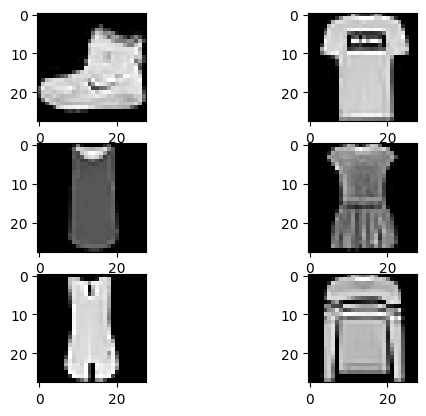

In [149]:
fig=plt.figure()
for i in range(6):
  image, lagel = train_data[i]
  fig.add_subplot(3,2,i+1)
  plt.imshow(image.squeeze(), cmap="gray")



## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [150]:
from torch.utils.data import DataLoader


class_names = train_data.classes
class_names
print(len(test_data))

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(test_data, batch_size = BATCH_SIZE,
                             shuffle = False)

10000


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [151]:
class modelCNN(nn.Module):
  def __init__(self, input_shape : int, hidden_units : int,
               output_shape : int):
    super().__init__()

    self.block_1 = nn.Sequential(nn.Conv2d(in_channels=input_shape,
                                           out_channels = hidden_units, kernel_size=3,
                                           stride = 1, padding=1),
                                 nn.ReLU(),
                                 nn.Conv2d(in_channels=hidden_units, out_channels = hidden_units,
                                           kernel_size = 3, padding = 1, stride = 1),
                                 nn.ReLU(),
                                 nn.MaxPool2d(kernel_size=2, stride = 2))
                  #14x14
    self.block_2 = nn.Sequential(nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                                           kernel_size=3, padding = 1, stride = 1),
                                 nn.ReLU(),
                                 nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                                           kernel_size=3, padding = 1, stride = 1),
                                 nn.ReLU(),
                                 nn.MaxPool2d(2)) #7x7

    self.block_3 = nn.Sequential(nn.Flatten(), nn.Linear(hidden_units*7*7,
                                                         out_features=output_shape))

  def forward(self, input_data):
      block_1_out = self.block_1(input_data)
      block_2_out = self.block_2(block_1_out)
      return self.block_3(block_2_out)


model_2 = modelCNN(1, 10, len(class_names)).to(device)
model_2

modelCNN(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_3): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [152]:
!pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy


acc_fn = Accuracy(task="multiclass", num_classes=len(class_names)).to(device) # send accuracy function to device

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.03)


epochs = 5

for epoch in range(epochs):

  train_loss = 0
  train_acc = 0
  for batch, (X,y) in enumerate(train_dataloader):
      model_2.train()
      X, y = X.to(device), y.to(device)
      y_pred = model_2(X)

      loss = loss_fn(y_pred, y)
      train_loss += loss
      #print(y.shape)
      #print(y_pred.shape)
      acc = acc_fn(y, y_pred.argmax(dim=1))
      train_acc += acc
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      #print(loss)
  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  test_loss, test_acc = 0, 0
  model_2.eval()
  for X, y in test_dataloader:
    X, y = X.to(device), y.to(device)

    test_pred = model_2(X)

    test_loss += loss_fn(test_pred, y)
    test_acc += acc_fn(y, test_pred.argmax(dim=1))

  test_loss /= len(test_dataloader)
  test_acc /= len(test_dataloader)


  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")


Train loss: 1.05171 | Test loss: 0.47791, Test acc: 0.83%


Train loss: 0.43455 | Test loss: 0.41638, Test acc: 0.85%


Train loss: 0.38178 | Test loss: 0.44556, Test acc: 0.83%


Train loss: 0.35209 | Test loss: 0.35718, Test acc: 0.87%


Train loss: 0.33217 | Test loss: 0.37393, Test acc: 0.87%



In [86]:
print(model_2(X.to(device))[1,:])

tensor([ 0.4433,  2.6331,  3.3318,  3.0240,  0.9382, -2.3381,  2.2680, -5.5644,
        -3.3785, -2.6680], device='cuda:0', grad_fn=<SliceBackward0>)


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

Estimated Label:
Pullover
True Label:
Pullover


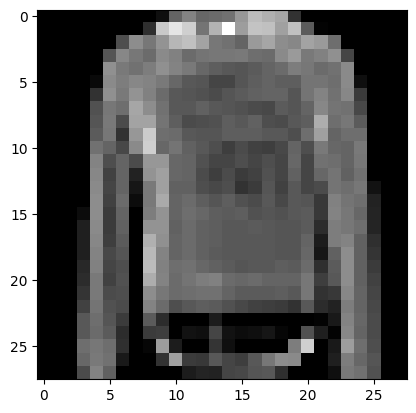

In [190]:
def imageplot(X):
  plt.imshow(X,cmap="gray")


model_2.eval()
image, label = test_data[16]

imageplot(image.squeeze())
x = image.to(device)
#print(x.shape)

output_label = model_2(x.unsqueeze(dim=0).to(device)).argmax(dim=1)
print("Estimated Label:")
print(class_names[output_label])
print("True Label:")
print(class_names[label])


## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [166]:
model_2.eval()
y_preds =[]
y_true = []
with torch.inference_mode():
  for X, y in test_dataloader:
    X,y = X.to(device), y.to(device)

    y_pred = model_2(X).argmax(dim=1)
    y_preds.append(y_pred)
    y_true.append(y)
y_preds_t = torch.cat(y_preds)
y_true_t = torch.cat(y_true)
print(y_preds_t.shape)
print(y_true_t.shape)


torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 2

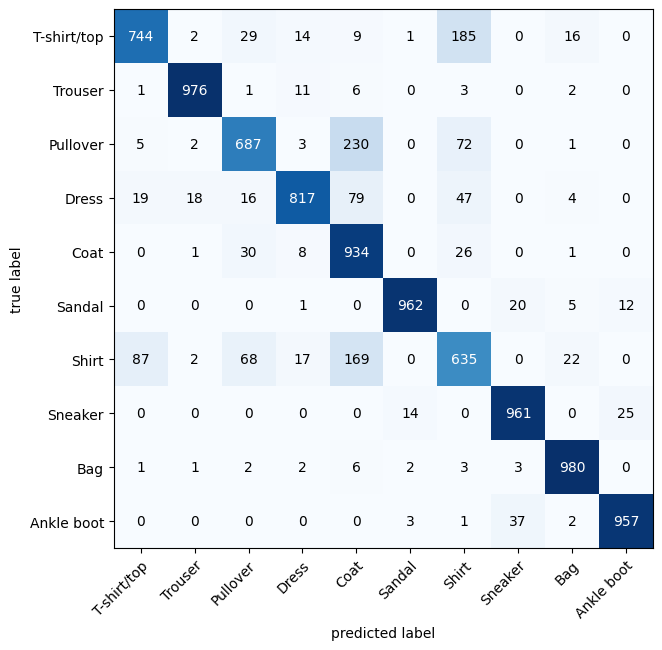

In [163]:
import mlxtend
from mlxtend.plotting import plot_confusion_matrix
from torchmetrics import ConfusionMatrix

confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_preds_t.to("cpu"),
                         target=y_true_t.to("cpu"))

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);


## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [80]:
KERNEL_SIZE = 10

test_2d = nn.Conv2d(3,1,kernel_size = KERNEL_SIZE)

x_test = torch.rand([1,3,64,64])
test_2d(x_test).shape

torch.Size([1, 1, 55, 55])

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?